# Classify Fashion Icons with Keras
## Spring 2023 - ICPE 638 

[Enrique Z. Losoya](https://orcid.org/0000-0001-7763-3349) and [Jian Tao](https://orcid.org/0000-0003-4228-6089), Texas A&M University 

Updated: Jan. 12, 2023.

HW Grade Points: /20

- Name: Juan David Baquero Barrios
- GitHub or Google colab link: https://drive.google.com/file/d/1SGnYf4lFcymZa6X-SENT3NIKh_YQw9UZ/view?usp=sharing

### Intructions 

1. Train a deep learning model with only Dense layers with the same number of neurons in each layer. Tune the number of neurons and other hyperparameters to reach at least 87% test accuracy (30 pts).

2. Double the number of layers used in #1, retrain the model without changing anything else, and explain the new accuracy reached. Is the new model better? If yes, why? If not, why not? (20 pts).

3. Double the number of neurons in each layer used in #1, retrain the model without changing anything else, and explain the new accuracy obtained. Is the new model better? If yes, why? If not, why not? (20 pts)

4. What else can you do to improve the accuracy of your model? (30 pts)
    Please propose up to 3 strategies. 10 pts will be given for each proven strategy. You need to apply your strategy and retrain the model to prove it.

In [ ]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


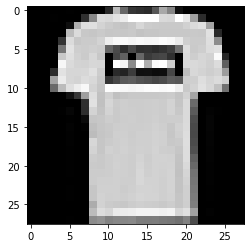

In [ ]:
# show the first image in the data set
plt.imshow(X_train[1], cmap="gray") # Import the image
plt.show() # Plot the image

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

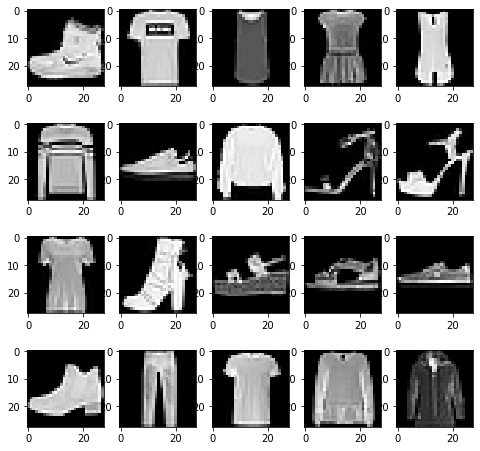

In [ ]:
fig = plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    #plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')

### 1. Train a deep learning model with only Dense layers with the same number of neurons in each layer. Tune the number of neurons and other hyperparameters to reach at least 87% test accuracy.

Ans. The final accuracy is 0.8736

In [ ]:
X_train = utils.normalize(X_train, axis=1)
X_test = utils.normalize(X_test, axis=1)

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(20, activation='relu', input_dim=5))
model.add(Dense(20, activation='elu'))
model.add(Dense(20, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=5, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6171 - accuracy: 0.7849 - val_loss: 0.4765 - val_accuracy: 0.8312
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4187 - accuracy: 0.8496 - val_loss: 0.4467 - val_accuracy: 0.8405
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3859 - accuracy: 0.8613 - val_loss: 0.4142 - val_accuracy: 0.8552
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3639 - accuracy: 0.8680 - val_loss: 0.3937 - val_accuracy: 0.8604
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3493 - accuracy: 0.8736 - val_loss: 0.3925 - val_accuracy: 0.8560


### 2. Double the number of layers used in #1, retrain the model without changing anything else, and explain the new accuracy reached. Is the new model better? If yes, why? If not, why not? 

Ans. The accuracy reached was 0.8697, which make me uderstand I built a more hierarchichal structure with the same quantity of neurons in each layer mkaing it more complex, and the results shows at each cycle of epoch, the results seems to mantein the same value. 

In [ ]:
model_1 = Sequential()
model_1.add(Flatten())
model_1.add(Dense(20, activation='relu', input_dim=5))
model_1.add(Dense(20, activation='elu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='elu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='softmax'))

In [ ]:
model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [ ]:
model_1.fit(x=X_train, y=y_train, epochs=5, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6631 - accuracy: 0.7612 - val_loss: 0.4837 - val_accuracy: 0.8288
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4314 - accuracy: 0.8439 - val_loss: 0.4388 - val_accuracy: 0.8448
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3925 - accuracy: 0.8588 - val_loss: 0.4158 - val_accuracy: 0.8505
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3702 - accuracy: 0.8664 - val_loss: 0.4213 - val_accuracy: 0.8470
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3586 - accuracy: 0.8692 - val_loss: 0.3963 - val_accuracy: 0.8541


### 3. Double the number of neurons in each layer used in #1, retrain the model without changing anything else, and explain the new accuracy obtained. Is the new model better? If yes, why? If not, why not? 

Ans. Increasing the numebr of neurons in each layer, in fact improves the accuracy of the model, the reason of this is that the fuction of the neuron is learn and correlate the data, therefore, increasing the number of each results in a better accuracy of the model.

In [ ]:
model_2 = Sequential()
model_2.add(Flatten())
model_2.add(Dense(40, activation='relu', input_dim=5))
model_2.add(Dense(40, activation='elu'))
model_2.add(Dense(40, activation='softmax'))

In [ ]:
model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [ ]:
model_2.fit(x=X_train, y=y_train, epochs=5, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5862 - accuracy: 0.7932 - val_loss: 0.4612 - val_accuracy: 0.8379
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4097 - accuracy: 0.8516 - val_loss: 0.4227 - val_accuracy: 0.8486
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3685 - accuracy: 0.8660 - val_loss: 0.3904 - val_accuracy: 0.8604
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3451 - accuracy: 0.8740 - val_loss: 0.3782 - val_accuracy: 0.8631
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3255 - accuracy: 0.8798 - val_loss: 0.3691 - val_accuracy: 0.8690


### 4. What else can you do to improve the accuracy of your model? (30 pts) Please propose up to 3 strategies. 10 pts will be given for each proven strategy. You need to apply your strategy and retrain the model to prove it.

Ans. To summarize the work which was carried out to fulfill this point, I tried to change the following inputs:

What does not work:

1.   Activation =  I changed the activation functions to tanh, linear, prelu, sigmoid, however, after several iterations, the best performance was relu, elu y softmax. So I kept those ones in this exercise.
2.  Validation batch size: is the number of samples use to validate in the model, however, the number of samples does not affect the accuracy.  

Which improves accuracy: 


1.   Input dimensions = I changed it to 15, to hace more neural network at the beginning of the network, however this change did not improve substantially the result.
2.   Optimizer = I tried several optimzers, specially for sparse data as ftrl, or others as sgd, RMSprop, adamax, and others, however, the only one which performs a little better is nadam
3.   epochs = as a neural network, it improves every time a neuron can train and iterate with the data, that is way changing the number of epochs, or the number of times a neuron iterarte with the entire data set imporves the accuracy of result. 
4.  Number of neurons =  Increasing number of neurons At the beginning, and and in an exponental way in the layer drastically boost the accuracy of the network, the reaseon is based you have more neurons training and extracting patterns from the data.

Conclusion. the correct optimizer, and increasing the number of epochs and neurons in each layer, have a direct correlation with the accuracy of the model. 

In [ ]:
model_3_1 = Sequential()
model_3_1.add(Flatten())
model_3_1.add(Dense(20, activation='relu', input_dim=5))
model_3_1.add(Dense(20, activation='elu'))
model_3_1.add(Dense(20, activation='softmax'))

In [ ]:
model_3_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [ ]:
tensorboard_callback_5 = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [ ]:
model_3_1.fit(x=X_train, y=y_train, epochs=5, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback_5])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6075 - accuracy: 0.7837 - val_loss: 0.4808 - val_accuracy: 0.8281
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4161 - accuracy: 0.8496 - val_loss: 0.4286 - val_accuracy: 0.8473
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3817 - accuracy: 0.8637 - val_loss: 0.4137 - val_accuracy: 0.8530
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3611 - accuracy: 0.8698 - val_loss: 0.4011 - val_accuracy: 0.8568
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3454 - accuracy: 0.8755 - val_loss: 0.3919 - val_accuracy: 0.8617


In [ ]:
model_3_2 = Sequential()
model_3_2.add(Flatten())
model_3_2.add(Dense(20, activation='relu', input_dim=15))
model_3_2.add(Dense(20, activation='elu'))
model_3_2.add(Dense(20, activation='softmax'))

In [ ]:
model_3_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

tensorboard_callback_1 = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [ ]:
model_3_2.fit(x=X_train, y=y_train, epochs=5, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback_1])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6223 - accuracy: 0.7867 - val_loss: 0.4849 - val_accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4131 - accuracy: 0.8510 - val_loss: 0.4135 - val_accuracy: 0.8529
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3779 - accuracy: 0.8634 - val_loss: 0.4308 - val_accuracy: 0.8379
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3590 - accuracy: 0.8697 - val_loss: 0.3968 - val_accuracy: 0.8580
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3448 - accuracy: 0.8742 - val_loss: 0.3806 - val_accuracy: 0.8623


In [ ]:
model_3_3 = Sequential()
model_3_3.add(Flatten())
model_3_3.add(Dense(512, activation='relu', input_dim=5))
model_3_3.add(Dense(256, activation='elu'))
model_3_3.add(Dense(128, activation='softmax'))


In [ ]:
model_3_3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
tensorboard_callback_2 = callbacks.TensorBoard(log_dir="logs",histogram_freq=1)

In [ ]:
model_3_3.fit(x=X_train, y=y_train, epochs=5, validation_batch_size=100, use_multiprocessing= True,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback_2])

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4822 - accuracy: 0.8231 - val_loss: 0.4320 - val_accuracy: 0.8361
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3520 - accuracy: 0.8690 - val_loss: 0.3612 - val_accuracy: 0.8701
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3158 - accuracy: 0.8818 - val_loss: 0.3367 - val_accuracy: 0.8755
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2893 - accuracy: 0.8917 - val_loss: 0.3345 - val_accuracy: 0.8788
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2698 - accuracy: 0.8982 - val_loss: 0.3526 - val_accuracy: 0.8749


In [ ]:
model_3_4 = Sequential()
model_3_4.add(Flatten())
model_3_4.add(Dense(512, activation='relu', input_dim=15))
model_3_4.add(Dense(256, activation='elu'))
model_3_4.add(Dense(128, activation='softmax'))
len(model.weights)

6

In [ ]:
model_3_4.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
tensorboard_callback_3 = callbacks.TensorBoard(log_dir="logs", histogram_freq=10)

In [ ]:
model_3_4.fit(x=X_train, y=y_train, epochs=15, validation_batch_size=1000, use_multiprocessing= True,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback_3])

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4754 - accuracy: 0.8262 - val_loss: 0.4023 - val_accuracy: 0.8556
Epoch 2/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3527 - accuracy: 0.8691 - val_loss: 0.3759 - val_accuracy: 0.8599
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3167 - accuracy: 0.8824 - val_loss: 0.3485 - val_accuracy: 0.8729
Epoch 4/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2887 - accuracy: 0.8911 - val_loss: 0.3279 - val_accuracy: 0.8791
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2703 - accuracy: 0.8981 - val_loss: 0.3192 - val_accuracy: 0.8830
Epoch 6/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2549 - accuracy: 0.9038 - val_loss: 0.3271 - val_accuracy: 0.8821
Epoch 7/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2410 - accuracy: 0.9084 - val_loss: 0.3410 -